In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "1"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.25it/s]

12it [00:00,  4.58it/s]

24it [00:00,  6.44it/s]

36it [00:00,  8.99it/s]

48it [00:00, 12.43it/s]

60it [00:00, 16.95it/s]

72it [00:00, 22.81it/s]

84it [00:01, 30.05it/s]

96it [00:01, 38.68it/s]

108it [00:01, 48.46it/s]

120it [00:01, 58.73it/s]

132it [00:01, 68.74it/s]

144it [00:01, 78.72it/s]

156it [00:01, 87.30it/s]

168it [00:01, 94.92it/s]

180it [00:01, 100.97it/s]

192it [00:01, 105.18it/s]

205it [00:02, 109.54it/s]

218it [00:02, 112.49it/s]

231it [00:02, 114.75it/s]

243it [00:02, 112.86it/s]

255it [00:02, 113.12it/s]

267it [00:02, 112.34it/s]

279it [00:02, 113.31it/s]

291it [00:02, 97.73it/s] 

302it [00:02, 96.56it/s]

314it [00:03, 101.51it/s]

325it [00:03, 102.48it/s]

337it [00:03, 106.53it/s]

350it [00:03, 110.20it/s]

362it [00:03, 112.63it/s]

374it [00:03, 114.63it/s]

386it [00:03, 108.44it/s]

397it [00:03, 97.08it/s] 

408it [00:03, 96.89it/s]

420it [00:04, 102.67it/s]

432it [00:04, 106.70it/s]

445it [00:04, 110.72it/s]

457it [00:04, 112.89it/s]

469it [00:04, 98.75it/s] 

480it [00:04, 92.22it/s]

492it [00:04, 98.40it/s]

504it [00:04, 103.91it/s]

517it [00:05, 106.18it/s]

528it [00:05, 98.86it/s] 

539it [00:05, 101.20it/s]

550it [00:05, 99.66it/s] 

562it [00:05, 104.46it/s]

574it [00:05, 107.88it/s]

586it [00:05, 111.07it/s]

598it [00:05, 113.24it/s]

610it [00:05, 114.60it/s]

623it [00:05, 116.27it/s]

635it [00:06, 116.01it/s]

647it [00:06, 95.41it/s] 

658it [00:06, 97.98it/s]

671it [00:06, 103.93it/s]

684it [00:06, 108.28it/s]

696it [00:06, 111.54it/s]

709it [00:06, 114.02it/s]

721it [00:06, 115.13it/s]

733it [00:06, 115.88it/s]

746it [00:07, 117.45it/s]

758it [00:07, 117.98it/s]

770it [00:07, 117.77it/s]

783it [00:07, 118.84it/s]

795it [00:07, 118.50it/s]

808it [00:07, 119.69it/s]

820it [00:07, 119.15it/s]

833it [00:07, 119.93it/s]

846it [00:07, 119.34it/s]

858it [00:08, 114.89it/s]

870it [00:08, 116.31it/s]

883it [00:08, 117.56it/s]

895it [00:08, 115.69it/s]

907it [00:08, 116.61it/s]

919it [00:08, 104.56it/s]

932it [00:08, 108.87it/s]

944it [00:08, 111.96it/s]

956it [00:08, 114.25it/s]

968it [00:09, 115.73it/s]

981it [00:09, 117.36it/s]

994it [00:09, 118.30it/s]

1007it [00:09, 118.90it/s]

1019it [00:09, 118.39it/s]

1031it [00:09, 117.72it/s]

1043it [00:09, 117.05it/s]

1055it [00:09, 116.54it/s]

1067it [00:09, 115.98it/s]

1079it [00:09, 116.16it/s]

1091it [00:10, 116.79it/s]

1104it [00:10, 117.88it/s]

1116it [00:10, 118.43it/s]

1128it [00:10, 111.30it/s]

1140it [00:10, 111.88it/s]

1152it [00:10, 108.83it/s]

1163it [00:10, 107.87it/s]

1175it [00:10, 110.59it/s]

1188it [00:10, 113.39it/s]

1200it [00:11, 110.93it/s]

1212it [00:11, 92.98it/s] 

1223it [00:11, 93.73it/s]

1234it [00:11, 96.58it/s]

1244it [00:11, 95.42it/s]

1256it [00:11, 101.16it/s]

1268it [00:11, 104.22it/s]

1280it [00:11, 106.76it/s]

1292it [00:11, 109.27it/s]

1304it [00:12, 111.17it/s]

1316it [00:12, 112.32it/s]

1328it [00:12, 111.60it/s]

1340it [00:12, 113.33it/s]

1352it [00:12, 115.03it/s]

1364it [00:12, 108.26it/s]

1375it [00:12, 108.16it/s]

1387it [00:12, 111.00it/s]

1399it [00:12, 113.35it/s]

1411it [00:13, 114.66it/s]

1423it [00:13, 109.67it/s]

1435it [00:13, 91.23it/s] 

1445it [00:13, 88.05it/s]

1455it [00:13, 90.19it/s]

1467it [00:13, 97.35it/s]

1479it [00:13, 102.74it/s]

1491it [00:13, 107.18it/s]

1503it [00:13, 110.46it/s]

1515it [00:14, 112.50it/s]

1528it [00:14, 114.71it/s]

1540it [00:14, 116.05it/s]

1552it [00:14, 116.92it/s]

1564it [00:14, 117.78it/s]

1576it [00:14, 118.14it/s]

1588it [00:14, 102.30it/s]

1600it [00:14, 105.74it/s]

1612it [00:14, 108.71it/s]

1624it [00:15, 111.13it/s]

1636it [00:15, 112.78it/s]

1648it [00:15, 113.61it/s]

1660it [00:15, 110.98it/s]

1672it [00:15, 112.34it/s]

1684it [00:15, 107.94it/s]

1696it [00:15, 109.62it/s]

1708it [00:15, 111.56it/s]

1720it [00:15, 93.29it/s] 

1730it [00:16, 84.74it/s]

1742it [00:16, 92.55it/s]

1752it [00:16, 94.31it/s]

1763it [00:16, 98.12it/s]

1775it [00:16, 103.75it/s]

1787it [00:16, 107.74it/s]

1799it [00:16, 103.14it/s]

1811it [00:16, 106.84it/s]

1823it [00:16, 109.38it/s]

1835it [00:17, 111.40it/s]

1847it [00:17, 113.36it/s]

1859it [00:17, 113.71it/s]

1871it [00:17, 109.80it/s]

1883it [00:17, 103.48it/s]

1895it [00:17, 107.37it/s]

1907it [00:17, 110.62it/s]

1919it [00:17, 111.60it/s]

1931it [00:17, 113.31it/s]

1943it [00:18, 113.85it/s]

1955it [00:18, 107.96it/s]

1966it [00:18, 106.30it/s]

1977it [00:18, 107.29it/s]

1988it [00:18, 98.97it/s] 

2000it [00:18, 103.76it/s]

2012it [00:18, 105.92it/s]

2024it [00:18, 108.89it/s]

2036it [00:18, 103.42it/s]

2048it [00:19, 106.26it/s]

2059it [00:19, 95.29it/s] 

2069it [00:19, 90.01it/s]

2080it [00:19, 92.89it/s]

2091it [00:19, 95.42it/s]

2103it [00:19, 101.21it/s]

2115it [00:19, 105.01it/s]

2127it [00:19, 107.17it/s]

2138it [00:19, 106.88it/s]

2150it [00:20, 109.30it/s]

2162it [00:20, 103.55it/s]

2174it [00:20, 107.22it/s]

2185it [00:20, 101.79it/s]

2196it [00:20, 102.82it/s]

2208it [00:20, 106.41it/s]

2220it [00:20, 108.93it/s]

2231it [00:20, 106.69it/s]

2243it [00:20, 109.68it/s]

2255it [00:21, 111.76it/s]

2267it [00:21, 113.83it/s]

2279it [00:21, 115.35it/s]

2291it [00:21, 115.70it/s]

2303it [00:21, 108.74it/s]

2315it [00:21, 111.06it/s]

2327it [00:21, 112.55it/s]

2339it [00:21, 112.13it/s]

2351it [00:21, 113.57it/s]

2363it [00:21, 114.54it/s]

2375it [00:22, 114.26it/s]

2387it [00:22, 113.80it/s]

2399it [00:22, 114.28it/s]

2411it [00:22, 111.63it/s]

2423it [00:22, 112.49it/s]

2435it [00:22, 113.04it/s]

2447it [00:22, 114.20it/s]

2459it [00:22, 114.27it/s]

2471it [00:22, 114.85it/s]

2483it [00:23, 113.41it/s]

2495it [00:23, 112.84it/s]

2507it [00:23, 108.42it/s]

2519it [00:23, 109.54it/s]

2531it [00:23, 111.12it/s]

2543it [00:23, 108.47it/s]

2554it [00:23, 106.17it/s]

2565it [00:23, 97.85it/s] 

2577it [00:23, 102.40it/s]

2588it [00:24, 101.14it/s]

2600it [00:24, 104.98it/s]

2612it [00:24, 108.27it/s]

2624it [00:24, 110.37it/s]

2636it [00:24, 111.76it/s]

2648it [00:24, 112.57it/s]

2660it [00:24, 105.83it/s]

2672it [00:24, 107.84it/s]

2684it [00:24, 110.51it/s]

2696it [00:24, 112.16it/s]

2708it [00:25, 113.32it/s]

2720it [00:25, 113.45it/s]

2732it [00:25, 111.75it/s]

2744it [00:25, 109.05it/s]

2756it [00:25, 111.44it/s]

2768it [00:25, 112.73it/s]

2780it [00:25, 113.70it/s]

2792it [00:25, 114.05it/s]

2804it [00:25, 114.59it/s]

2816it [00:26, 115.55it/s]

2828it [00:26, 115.27it/s]

2840it [00:26, 115.10it/s]

2852it [00:26, 114.57it/s]

2864it [00:26, 114.72it/s]

2876it [00:26, 114.90it/s]

2888it [00:26, 114.23it/s]

2900it [00:26, 114.67it/s]

2912it [00:26, 115.56it/s]

2924it [00:26, 115.68it/s]

2936it [00:27, 115.64it/s]

2948it [00:27, 116.07it/s]

2960it [00:27, 116.51it/s]

2972it [00:27, 116.99it/s]

2984it [00:27, 116.94it/s]

2996it [00:27, 116.54it/s]

3008it [00:27, 116.32it/s]

3020it [00:27, 116.62it/s]

3032it [00:27, 116.39it/s]

3044it [00:28, 115.56it/s]

3056it [00:28, 101.17it/s]

3067it [00:28, 97.51it/s] 

3079it [00:28, 101.49it/s]

3091it [00:28, 104.09it/s]

3103it [00:28, 106.37it/s]

3114it [00:28, 103.17it/s]

3126it [00:28, 106.61it/s]

3138it [00:28, 109.81it/s]

3150it [00:29, 111.63it/s]

3162it [00:29, 113.55it/s]

3174it [00:29, 114.88it/s]

3186it [00:29, 114.72it/s]

3198it [00:29, 115.34it/s]

3210it [00:29, 112.89it/s]

3222it [00:29, 110.95it/s]

3234it [00:29, 112.75it/s]

3246it [00:29, 113.23it/s]

3258it [00:29, 113.07it/s]

3270it [00:30, 108.95it/s]

3281it [00:30, 104.17it/s]

3293it [00:30, 107.10it/s]

3304it [00:30, 101.90it/s]

3315it [00:30, 102.47it/s]

3327it [00:30, 106.12it/s]

3339it [00:30, 108.58it/s]

3351it [00:30, 110.18it/s]

3363it [00:30, 111.83it/s]

3375it [00:31, 112.59it/s]

3387it [00:31, 112.92it/s]

3399it [00:31, 114.11it/s]

3411it [00:31, 114.64it/s]

3423it [00:31, 111.01it/s]

3435it [00:31, 109.56it/s]

3447it [00:31, 111.11it/s]

3459it [00:31, 112.27it/s]

3471it [00:31, 109.77it/s]

3483it [00:32, 112.44it/s]

3495it [00:32, 113.89it/s]

3507it [00:32, 114.37it/s]

3519it [00:32, 114.54it/s]

3531it [00:32, 115.52it/s]

3543it [00:32, 116.24it/s]

3555it [00:32, 116.91it/s]

3567it [00:32, 116.80it/s]

3579it [00:32, 116.63it/s]

3591it [00:32, 116.73it/s]

3603it [00:33, 115.15it/s]

3615it [00:33, 115.08it/s]

3627it [00:33, 104.08it/s]

3638it [00:33, 98.30it/s] 

3650it [00:33, 103.49it/s]

3662it [00:33, 107.74it/s]

3674it [00:33, 110.67it/s]

3686it [00:33, 111.37it/s]

3698it [00:33, 112.60it/s]

3710it [00:34, 113.08it/s]

3722it [00:34, 112.61it/s]

3734it [00:34, 113.49it/s]

3746it [00:34, 113.51it/s]

3758it [00:34, 98.51it/s] 

3769it [00:34, 99.98it/s]

3780it [00:34, 98.79it/s]

3792it [00:34, 103.47it/s]

3804it [00:34, 107.31it/s]

3816it [00:35, 110.38it/s]

3828it [00:35, 105.86it/s]

3839it [00:35, 95.88it/s] 

3851it [00:35, 99.27it/s]

3863it [00:35, 103.12it/s]

3874it [00:35, 92.50it/s] 

3885it [00:35, 96.74it/s]

3897it [00:35, 102.24it/s]

3909it [00:36, 106.18it/s]

3921it [00:36, 109.24it/s]

3933it [00:36, 111.25it/s]

3945it [00:36, 104.92it/s]

3956it [00:36, 96.02it/s] 

3968it [00:36, 101.67it/s]

3979it [00:36, 102.26it/s]

3991it [00:36, 105.26it/s]

4002it [00:36, 105.26it/s]

4014it [00:37, 108.07it/s]

4025it [00:37, 104.57it/s]

4037it [00:37, 107.74it/s]

4049it [00:37, 110.06it/s]

4061it [00:37, 106.06it/s]

4072it [00:37, 106.94it/s]

4084it [00:37, 108.32it/s]

4096it [00:37, 110.90it/s]

4108it [00:37, 110.88it/s]

4120it [00:37, 112.84it/s]

4132it [00:38, 114.29it/s]

4144it [00:38, 114.63it/s]

4156it [00:38, 110.52it/s]

4158it [00:38, 108.51it/s]


0it [00:00, ?it/s]

12it [00:00, 119.94it/s]

Number of empty sat catalogs is 2


24it [00:00, 118.93it/s]

32it [00:00, 102.88it/s]

41it [00:00, 95.69it/s] 

50it [00:00, 91.68it/s]

59it [00:00, 89.69it/s]

68it [00:00, 88.21it/s]

77it [00:00, 87.27it/s]

87it [00:00, 89.69it/s]

98it [00:01, 92.00it/s]

109it [00:01, 95.93it/s]

120it [00:01, 99.00it/s]

131it [00:01, 101.98it/s]

144it [00:01, 107.57it/s]

157it [00:01, 112.11it/s]

169it [00:01, 108.04it/s]

180it [00:01, 108.57it/s]

193it [00:01, 113.12it/s]

206it [00:02, 115.98it/s]

219it [00:02, 118.16it/s]

231it [00:02, 106.60it/s]

244it [00:02, 111.02it/s]

257it [00:02, 113.75it/s]

269it [00:02, 97.21it/s] 

280it [00:02, 85.53it/s]

290it [00:02, 87.71it/s]

302it [00:03, 94.50it/s]

314it [00:03, 99.04it/s]

326it [00:03, 102.80it/s]

337it [00:03, 104.77it/s]

349it [00:03, 106.58it/s]

360it [00:03, 102.37it/s]

372it [00:03, 104.63it/s]

383it [00:03, 98.72it/s] 

396it [00:03, 104.56it/s]

409it [00:03, 109.58it/s]

422it [00:04, 113.40it/s]

435it [00:04, 116.00it/s]

448it [00:04, 118.65it/s]

461it [00:04, 121.78it/s]

474it [00:04, 121.39it/s]

487it [00:04, 120.66it/s]

500it [00:04, 122.27it/s]

513it [00:04, 123.58it/s]

526it [00:04, 122.89it/s]

539it [00:05, 119.72it/s]

552it [00:05, 117.89it/s]

565it [00:05, 118.52it/s]

578it [00:05, 120.51it/s]

591it [00:05, 118.44it/s]

603it [00:05, 110.05it/s]

615it [00:05, 101.64it/s]

626it [00:05, 102.08it/s]

639it [00:05, 107.81it/s]

652it [00:06, 112.68it/s]

664it [00:06, 86.94it/s] 

677it [00:06, 96.10it/s]

689it [00:06, 100.48it/s]

702it [00:06, 106.89it/s]

715it [00:06, 112.48it/s]

728it [00:06, 116.37it/s]

741it [00:06, 118.74it/s]

754it [00:07, 119.79it/s]

767it [00:07, 122.12it/s]

780it [00:07, 116.49it/s]

793it [00:07, 119.09it/s]

806it [00:07, 121.69it/s]

819it [00:07, 124.04it/s]

833it [00:07, 126.34it/s]

846it [00:07, 127.12it/s]

859it [00:07, 126.08it/s]

872it [00:07, 126.20it/s]

885it [00:08, 119.25it/s]

898it [00:08, 110.29it/s]

911it [00:08, 114.16it/s]

924it [00:08, 117.66it/s]

937it [00:08, 119.22it/s]

950it [00:08, 104.43it/s]

961it [00:08, 104.47it/s]

974it [00:08, 110.49it/s]

987it [00:08, 115.20it/s]

999it [00:09, 108.25it/s]

1011it [00:09, 110.89it/s]

1023it [00:09, 100.93it/s]

1034it [00:09, 95.62it/s] 

1044it [00:09, 93.60it/s]

1056it [00:09, 98.25it/s]

1068it [00:09, 102.56it/s]

1080it [00:09, 106.16it/s]

1091it [00:10, 101.82it/s]

1102it [00:10, 97.48it/s] 

1112it [00:10, 92.82it/s]

1125it [00:10, 101.01it/s]

1138it [00:10, 107.46it/s]

1151it [00:10, 112.74it/s]

1164it [00:10, 116.40it/s]

1177it [00:10, 120.15it/s]

1190it [00:10, 121.95it/s]

1203it [00:11, 123.78it/s]

1216it [00:11, 122.79it/s]

1229it [00:11, 124.01it/s]

1242it [00:11, 125.46it/s]

1255it [00:11, 126.17it/s]

1268it [00:11, 126.92it/s]

1281it [00:11, 127.72it/s]

1294it [00:11, 127.91it/s]

1307it [00:11, 117.39it/s]

1319it [00:11, 115.94it/s]

1332it [00:12, 119.55it/s]

1345it [00:12, 121.35it/s]

1358it [00:12, 109.77it/s]

1371it [00:12, 115.10it/s]

1384it [00:12, 118.41it/s]

1397it [00:12, 120.04it/s]

1410it [00:12, 121.89it/s]

1423it [00:12, 123.34it/s]

1436it [00:12, 123.92it/s]

1449it [00:13, 124.64it/s]

1462it [00:13, 125.64it/s]

1475it [00:13, 126.66it/s]

1488it [00:13, 125.66it/s]

1501it [00:13, 125.14it/s]

1514it [00:13, 125.97it/s]

1527it [00:13, 125.15it/s]

1540it [00:13, 125.73it/s]

1553it [00:13, 126.91it/s]

1567it [00:13, 127.71it/s]

1580it [00:14, 117.29it/s]

1593it [00:14, 120.63it/s]

1606it [00:14, 122.73it/s]

1619it [00:14, 123.88it/s]

1632it [00:14, 124.47it/s]

1645it [00:14, 125.37it/s]

1658it [00:14, 126.02it/s]

1671it [00:14, 122.29it/s]

1684it [00:14, 109.81it/s]

1696it [00:15, 99.77it/s] 

1708it [00:15, 104.47it/s]

1720it [00:15, 107.06it/s]

1732it [00:15, 109.52it/s]

1745it [00:15, 113.69it/s]

1758it [00:15, 117.05it/s]

1770it [00:15, 113.58it/s]

1783it [00:15, 117.70it/s]

1796it [00:15, 120.79it/s]

1809it [00:16, 122.65it/s]

1822it [00:16, 124.38it/s]

1835it [00:16, 121.88it/s]

1848it [00:16, 119.98it/s]

1861it [00:16, 121.19it/s]

1874it [00:16, 122.82it/s]

1887it [00:16, 104.34it/s]

1899it [00:16, 106.50it/s]

1912it [00:16, 112.13it/s]

1926it [00:17, 117.17it/s]

1940it [00:17, 120.89it/s]

1953it [00:17, 123.15it/s]

1966it [00:17, 120.99it/s]

1979it [00:17, 122.75it/s]

1992it [00:17, 117.75it/s]

2005it [00:17, 120.69it/s]

2018it [00:17, 113.52it/s]

2030it [00:17, 114.08it/s]

2043it [00:18, 117.18it/s]

2056it [00:18, 119.18it/s]

2069it [00:18, 120.41it/s]

2082it [00:18, 122.45it/s]

2095it [00:18, 123.37it/s]

2108it [00:18, 123.90it/s]

2121it [00:18, 125.06it/s]

2134it [00:18, 125.52it/s]

2147it [00:18, 125.82it/s]

2160it [00:18, 124.81it/s]

2173it [00:19, 110.01it/s]

2185it [00:19, 111.72it/s]

2198it [00:19, 115.77it/s]

2211it [00:19, 119.02it/s]

2224it [00:19, 114.94it/s]

2236it [00:19, 100.50it/s]

2247it [00:19, 100.85it/s]

2260it [00:19, 108.09it/s]

2273it [00:20, 113.68it/s]

2285it [00:20, 108.30it/s]

2297it [00:20, 110.32it/s]

2309it [00:20, 107.70it/s]

2321it [00:20, 110.50it/s]

2334it [00:20, 114.73it/s]

2347it [00:20, 118.62it/s]

2360it [00:20, 121.22it/s]

2373it [00:20, 122.54it/s]

2386it [00:20, 123.21it/s]

2399it [00:21, 121.34it/s]

2412it [00:21, 121.84it/s]

2425it [00:21, 122.92it/s]

2438it [00:21, 123.23it/s]

2451it [00:21, 122.93it/s]

2464it [00:21, 107.37it/s]

2476it [00:21, 104.25it/s]

2489it [00:21, 110.33it/s]

2502it [00:21, 115.02it/s]

2515it [00:22, 119.14it/s]

2529it [00:22, 122.24it/s]

2543it [00:22, 124.51it/s]

2556it [00:22, 123.11it/s]

2569it [00:22, 124.55it/s]

2582it [00:22, 122.04it/s]

2595it [00:22, 124.23it/s]

2609it [00:22, 125.89it/s]

2623it [00:22, 127.27it/s]

2636it [00:23, 127.93it/s]

2649it [00:23, 128.33it/s]

2663it [00:23, 128.87it/s]

2676it [00:23, 128.48it/s]

2689it [00:23, 128.65it/s]

2702it [00:23, 127.96it/s]

2715it [00:23, 128.38it/s]

2728it [00:23, 128.47it/s]

2741it [00:23, 128.81it/s]

2754it [00:23, 127.61it/s]

2767it [00:24, 127.47it/s]

2780it [00:24, 110.77it/s]

2792it [00:24, 100.52it/s]

2803it [00:24, 95.42it/s] 

2815it [00:24, 100.31it/s]

2828it [00:24, 106.50it/s]

2841it [00:24, 111.07it/s]

2854it [00:24, 114.60it/s]

2867it [00:25, 118.21it/s]

2880it [00:25, 117.49it/s]

2892it [00:25, 117.42it/s]

2905it [00:25, 119.94it/s]

2918it [00:25, 121.91it/s]

2931it [00:25, 122.59it/s]

2944it [00:25, 121.35it/s]

2957it [00:25, 123.62it/s]

2970it [00:25, 125.35it/s]

2983it [00:25, 125.93it/s]

2996it [00:26, 105.18it/s]

3009it [00:26, 110.05it/s]

3021it [00:26, 110.82it/s]

3034it [00:26, 114.90it/s]

3047it [00:26, 117.73it/s]

3060it [00:26, 120.70it/s]

3073it [00:26, 122.27it/s]

3086it [00:26, 108.51it/s]

3098it [00:27, 111.33it/s]

3111it [00:27, 115.90it/s]

3124it [00:27, 119.12it/s]

3138it [00:27, 122.28it/s]

3151it [00:27, 123.90it/s]

3164it [00:27, 121.44it/s]

3177it [00:27, 123.06it/s]

3190it [00:27, 123.03it/s]

3203it [00:27, 123.89it/s]

3216it [00:27, 123.79it/s]

3229it [00:28, 109.10it/s]

3241it [00:28, 111.50it/s]

3254it [00:28, 114.93it/s]

3266it [00:28, 115.15it/s]

3279it [00:28, 117.68it/s]

3292it [00:28, 120.51it/s]

3305it [00:28, 121.91it/s]

3318it [00:28, 121.58it/s]

3331it [00:28, 120.70it/s]

3344it [00:29, 121.47it/s]

3357it [00:29, 99.35it/s] 

3368it [00:29, 98.91it/s]

3379it [00:29, 89.89it/s]

3390it [00:29, 93.94it/s]

3403it [00:29, 101.52it/s]

3416it [00:29, 108.42it/s]

3429it [00:29, 113.56it/s]

3442it [00:30, 116.18it/s]

3455it [00:30, 119.50it/s]

3468it [00:30, 119.11it/s]

3481it [00:30, 120.46it/s]

3494it [00:30, 121.71it/s]

3507it [00:30, 122.96it/s]

3520it [00:30, 123.73it/s]

3533it [00:30, 124.16it/s]

3546it [00:30, 124.44it/s]

3559it [00:30, 125.06it/s]

3572it [00:31, 118.31it/s]

3584it [00:31, 118.21it/s]

3597it [00:31, 119.35it/s]

3610it [00:31, 121.48it/s]

3623it [00:31, 122.19it/s]

3636it [00:31, 123.04it/s]

3649it [00:31, 124.31it/s]

3662it [00:31, 125.11it/s]

3675it [00:31, 125.56it/s]

3688it [00:31, 125.56it/s]

3701it [00:32, 125.83it/s]

3714it [00:32, 125.53it/s]

3727it [00:32, 124.94it/s]

3740it [00:32, 125.44it/s]

3753it [00:32, 125.43it/s]

3766it [00:32, 122.29it/s]

3779it [00:32, 118.90it/s]

3792it [00:32, 121.84it/s]

3805it [00:32, 123.28it/s]

3818it [00:33, 115.82it/s]

3830it [00:33, 108.79it/s]

3843it [00:33, 113.70it/s]

3856it [00:33, 117.07it/s]

3869it [00:33, 118.22it/s]

3882it [00:33, 120.05it/s]

3895it [00:33, 119.17it/s]

3908it [00:33, 121.19it/s]

3921it [00:33, 121.44it/s]

3934it [00:34, 121.45it/s]

3947it [00:34, 121.98it/s]

3960it [00:34, 105.06it/s]

3973it [00:34, 110.29it/s]

3986it [00:34, 114.08it/s]

3999it [00:34, 117.74it/s]

4012it [00:34, 119.54it/s]

4025it [00:34, 122.46it/s]

4038it [00:34, 124.05it/s]

4051it [00:35, 124.78it/s]

4064it [00:35, 125.14it/s]

4077it [00:35, 116.63it/s]

4090it [00:35, 119.58it/s]

4103it [00:35, 120.94it/s]

4116it [00:35, 122.57it/s]

4129it [00:35, 116.42it/s]

4142it [00:35, 118.41it/s]

4155it [00:35, 120.45it/s]

4158it [00:35, 115.71it/s]

Number of empty sat catalogs is 2


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

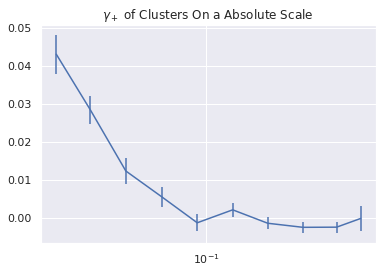

Aggregated xi:
[-21.7531 -30.1585 -19.9945 -14.8264   5.5317 -14.7462  14.2525  32.3391
  28.4561   0.2693]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2184.938   -4104.5337  -5482.1475  -7775.8824 -10446.6981 -13459.7294
 -14821.425  -12922.3774  -6241.5773   -377.9867]
------------------------------------------------------------------------------
Aggregated npairs:
[  505.  1062.  1619.  2683.  4317.  6937. 10112. 13052. 11666.  1806.]
------------------------------------------------------------------------------
Mean xi:
[-0.0431 -0.0284 -0.0123 -0.0055  0.0013 -0.0021  0.0014  0.0025  0.0024
  0.0001]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3266 -3.8649 -3.3861 -2.8982 -2.4199 -1.9403 -1.4657 -0.9901 -0.535
 -0.2093]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

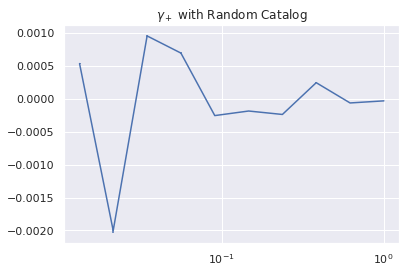

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3444e-06  3.1065e-05 -1.4866e-05 -1.0818e-05  3.9331e-06  2.8546e-06
  3.6659e-06 -3.8315e-06  9.5137e-07  4.5652e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

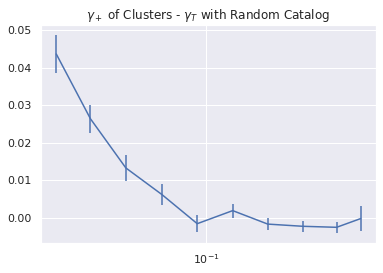

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

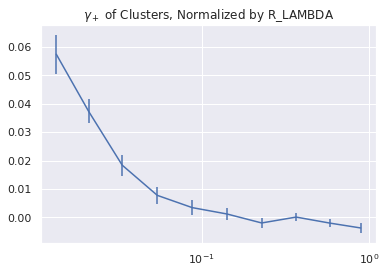

Aggregated xi:
[-14.6488 -27.5392 -23.4326 -15.2592 -11.2576  -6.4217  15.9906  -1.4087
  26.6903  30.4809]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1096.0165  -2840.6128  -4321.8326  -5717.7893  -7927.4485 -10300.2628
 -12124.0768 -11383.7815  -7131.4875   -954.4097]
------------------------------------------------------------------------------
Aggregated npairs:
[  255.   737.  1274.  1965.  3262.  5272.  8214. 11352. 13294.  8221.]
------------------------------------------------------------------------------
Mean xi:
[-0.0574 -0.0374 -0.0184 -0.0078 -0.0035 -0.0012  0.0019 -0.0001  0.002
  0.0037]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2981 -3.8543 -3.3923 -2.9098 -2.4302 -1.9538 -1.476  -1.0028 -0.5364
 -0.1161]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)